# Метод опорных векторов в задачах классификации

## 1. Введение

`Методы (машины) опорных векторов (сокращенно SVM)` — это алгоритмы машинного обучения, которые используются для классификации, регрессии и определения выбросов. 

Классификатор SVM строит модель, которая присваивает новые точки данных одной из заданных категорий. Таким образом, его можно рассматривать как `невероятностный бинарный линейный классификатор`.

Оригинальный алгоритм SVM был разработан Владимиром Вапником и Алексеем Червоненкисом в 1963 году. В 1992 году Бернхард Бозер, Изабель Гийон и Владимир Вапник предложили способ создания нелинейных классификаторов, применяя `трюк ядра к гиперплоскостям с максимальным запасом`.

В дополнение к выполнению линейной классификации SVM могут эффективно выполнять `нелинейную классификацию`, используя трюк ядра. Это позволяет нам неявно отображать входные данные в пространстве признаков высокой размерности.

## 2. Терминология SVM

**Гиперплоскость**

`Гиперплоскость` — это граница решения, которая разделяет набор точек данных, имеющих разные метки классов. Классификатор SVM разделяет точки данных, используя гиперплоскость с максимальным запасом. Эта гиперплоскость известна как, `maximum margin hyperplane`. А линейный классификатор, который она определяет, известен как `maximum margin classifier`.

**Опорные векторы**

`Опорные векторы` — это опорные точки данных, которые находятся ближе всего к гиперплоскости. Эти точки данных будут лучше определять разделяющую линию или гиперплоскость путем расчета полей.

**Поле**

`Поле` — это зазор между двумя линиями в ближайших точках данных. Он рассчитывается как перпендикулярное расстояние от линии до опорных векторов или ближайших точек данных. В SVM мы пытаемся максимизировать это значение, чтобы получить максимальный зазор.

Следующая диаграмма наглядно иллюстрирует эти определения.

![Margin in SVM](https://static.wixstatic.com/media/8f929f_7ecacdcf69d2450087cb4a898ef90837~mv2.png)

В SVM наша главная цель — `выбрать гиперплоскость с максимально возможным запасом между опорными векторами в заданном наборе данных`. 

SVM ищет гиперплоскость с максимальным полем.

- Создаются гиперплоскости, которые наилучшим образом разделяют классы. Есть много гиперплоскостей, которые могут классифицировать данные. Мы должны искать наилучшую гиперплоскость, которая представляет наибольшее расстояние или границу между двумя классами.

-  Гиперплоскости выбираются так, чтобы расстояние от нее до опорных векторов с каждой стороны было максимальным. Если такая гиперплоскость существует, она известна как `гиперплоскость максимального поля`, а определяемый ею линейный классификатор известен как `классификатор максимального поля`.

Следующая диаграмма наглядно иллюстрирует концепцию максимального поля и гиперплоскости максимального поля.

![Maximum margin hyperplane](https://static.packt-cdn.com/products/9781783555130/graphics/3547_03_07.jpg)

## 3. Трюк с ядром

Иногда выборочные точки данных настолько разбросаны, что их невозможно разделить с помощью линейной гиперплоскости. В такой ситуации SVM использует `kernel trick` (трюк с ядром) для преобразования входного пространства в пространство большего размера, как показано на диаграмме ниже. 

Он использует функцию отображения для преобразования двумерного входного пространства в трехмерное входное пространство. Теперь мы можем легко разделить точки данных, используя линейное разделение.

`Трюк с ядром (kernel trick)` - преобразование входного пространства в пространство более высокой размерности.

![Kernel trick](http://www.aionlinecourse.com/uploads/tutorials/2019/07/11_21_kernel_svm_3.png)

Мы можем определить функцию ядра следующим образом:

![Kernel function](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTodZptqcRor0LGo8Qn7_kJB9n9BACMt6jgIPZ4C3g_rgh_uSRZLQ&s)

В контексте SVM есть 4 популярных ядра: 

- `Linear kernel`, 

- `Polynomial kernel`, 

- `Radial Basis Function (RBF) kernel` (также называемое ядром Гаусса) 

- `Sigmoid kernel`.

Например,
```
>>> linear_svc = svm.SVC(kernel='linear')
>>> linear_svc.kernel
'linear'
>>> rbf_svc = svm.SVC(kernel='rbf')
>>> rbf_svc.kernel
'rbf'
```

### 3.1. Линейное ядро

В линейном ядре функция ядра принимает форму линейной функции следующим образом:

линейное ядро: $K(x_i, x_j) = x_i^T x_j$

Линейное ядро ​​используется, когда `данные линейно разделимы`. Это означает, что данные можно разделить с помощью одной строки. Это одно из наиболее часто используемых ядер. Он в основном используется, когда в наборе данных имеется большое количество функций. Линейное ядро ​​часто используется для целей `классификации текста`.

Обучение с линейным ядром обычно быстрее, потому что нам нужно только `оптимизировать параметр регуляризации C`. При обучении с другими ядрами нам также необходимо оптимизировать `параметр γ (гамма)`. Таким образом, выполнение поиска по сетке обычно занимает больше времени.

Линейное ядро ​​можно представить на следующем рисунке.

![Linear Kernel](https://scikit-learn.org/stable/_images/sphx_glr_plot_svm_kernels_thumb.png)

### 3.2 Полиномиальное ядро

Полиномиальное ядро ​​представляет собой сходство векторов (обучающих выборок) в пространстве признаков над полиномами исходных переменных. Полиномиальное ядро ​​рассматривает не только заданные характеристики входных выборок, чтобы определить их сходство, но и комбинации входных выборок.

Для `полиномов степени d` ядро ​​полинома определяется следующим образом:

Полиномиальное ядро: $K(x_i, x_j) = (γx_i^T x_j + r)d, γ > 0$

Полиномиальное ядро ​​очень популярно в `обработке естественного языка`. Наиболее распространенная степень d = 2 (квадратичная), поскольку более высокие степени имеют тенденцию к `переобучению в задачах НЛП`. Это можно представить с помощью следующей схемы.

![Polynomial Kernel](https://www.researchgate.net/profile/Cheng_Soon_Ong/publication/23442384/figure/fig12/AS:341444054274063@1458418014823/The-effect-of-the-degree-of-a-polynomial-kernel-The-polynomial-kernel-of-degree-1-leads.png)

### 3.3 Ядро радиальной базисной функции

`Ядро радиальной базисной функции (Radial Basis Function — RBF)` является ядром общего назначения. Он используется, когда у нас нет предварительных знаний о данных. Ядро RBF для двух выборок x и y определяется следующим уравнением:

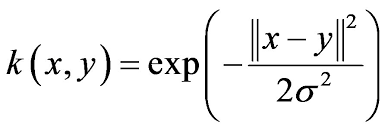

Следующая диаграмма демонстрирует классификацию SVM с ядром rbf.

![SVM Classification with rbf kernel](https://www.researchgate.net/profile/Periklis_Gogas/publication/286180566/figure/fig5/AS:304327777374210@1449568804246/An-example-of-an-SVM-classification-using-the-RBF-kernel-The-two-classes-are-separated.png)

При обучении SVM с ядром Радиальной Базовой Функции необходимо учитывать два параметра: `C` и `gamma`. 

Параметр C, общий для всех ядер SVM, `компенсирует неправильную классификацию обучающих примеров простотой поверхности принятия решений`. Низкое значение C делает поверхность принятия решения гладкой, а высокое C правильные классификации всех обучающих примеров. 

gamma определяет, `какое влияние имеет один обучающий пример`. Чем больше gamma, тем больше примеров должно быть затронуто.

### 3.4 Сигмовидное ядро

`Сигмовидное ядро` ​​берет свое начало в нейронных сетях. Мы можем использовать его как прокси для нейронных сетей. Сигмовидное ядро ​​задается следующим уравнением

сигмовидное ядро: $k(x, y) = th(αx^Ty + c)$

Сигмовидное ядро ​​можно визуализировать с помощью следующей диаграммы:

![Sigmoid kernel](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTKeXbOIlniBXYwMYlEYLKPwZZg8vFU1wVm3RWMACjVcT4iBVDy&s)

## 4. Библиотеки SVM в Scikit-Learn

Scikit-Learn предоставляет полезные библиотеки для реализации алгоритма машины опорных векторов в наборе данных. 

Во-первых, есть классификатор `LinearSVC()`. Как следует из названия, этот классификатор использует только `линейное ядро`. В классификаторе LinearSVC() мы не передаем значение ядра, поскольку оно используется только для целей линейной классификации.

Scikit-Learn предоставляет два других классификатора — `SVC()` и `NuSVC()`, которые используются для целей классификации. Эти классификаторы в основном схожи с некоторой разницей в параметрах. 

NuSVC() похож на SVC(), но использует `параметр для управления количеством опорных векторов`. Мы передаем `значения ядра`, `гаммы` и `C` вместе с другими параметрами. По умолчанию параметр ядра использует rbf в качестве значения, но мы можем передавать такие значения, как поли, линейная, сигмовидная или вызываемая (пользовательская) функция.

## 5. Пример датасета

В качестве примера мы используем набор данных `Predicting a Pulsar Star`.

`Пульсары` — это редкий тип нейтронных звезд, которые производят радиоизлучение, обнаруживаемое на Земле. Они представляют значительный научный интерес как зонды пространства-времени, межзвездной среды и состояний материи. 

<img src="https://allofyourbases.files.wordpress.com/2019/03/lightnew.gif?w=320&zoom=2" width="40%">

В частности, к ним можно применять алгоритмы классификации, которые рассматривают наборы данных как проблему бинарной классификации. Здесь примеры пульсаров образуют положительный класс меньшинства, а ложные примеры образуют большинство отрицательного класса.

Представленный [набор данных](https://github.com/SerjiEvg/data-analysis/raw/main/data/pulsar_stars.csv) содержит 16 259 ложных сигналов, вызванных радиопомехами/шумом, и 1 639 примеров реальных пульсаров. 

В каждой строке сначала перечислены переменные, а метка класса является последней записью. Используемые метки классов: 0 (отрицательный) и 1 (положительный).

Пульсары сами по себе довольно интересные объекты, они используются в качестве зонда звездной эволюции, а также используются для проверки общей теории относительности из-за их чрезвычайно высокой плотности. В наши дни они также используются для обнаружения и картографирования сигнатур гравитационных волн . Однако их идентификация в потоках данных с радиотелескопов нетривиальна. Существует множество искусственных источников радиочастотных помех, которые могут имитировать сигналы пульсаров. Классифицировать образцы данных-кандидатов как пульсар или не пульсар — серьезное дело.

Все отдельные импульсы разные, поэтому астрономы суммируют их и создают `усредненный интегрированный профиль импульса`, чтобы охарактеризовать конкретный пульсар:

<img src="https://allofyourbases.files.wordpress.com/2019/03/pulsestack-e1552071632736.gif?w=302&h=477&zoom=2" width="20%">

Кроме того, импульс будет поступать в разное время на разных радиочастотах. Задержка от частоты к частоте вызвана ионизированной межзвездной средой и известна как дисперсия. Это выглядит так:

<img src="https://allofyourbases.files.wordpress.com/2019/03/dispersion.png?w=768&h=975" width="40%">

Астрономы подгоняют форму задержки, чтобы компенсировать ее эффект, но всегда есть неопределенность, связанная с подгонкой. Это выражается на кривой DM-SNR («отношение дисперсионного сигнала к шуму»), которая выглядит следующим образом:

<img src="https://allofyourbases.files.wordpress.com/2019/03/dm_snr.png" width="40%">

Когда вы соединяете эти две кривые вместе, это означает, что для каждого пульсара-кандидата есть восемь числовых характеристик , которые можно извлечь стандартно: `четыре из интегрированного профиля импульса и четыре из кривой DM-SNR`:

<img src="https://allofyourbases.files.wordpress.com/2019/03/pulsar_features.png?w=768" width="40%">

Информация об атрибутах:

Каждый кандидат описывается 8 непрерывными переменными и одной переменной класса. 

Первые четыре представляют собой простые статистические данные, полученные из интегрированного профиля импульса. 

Остальные четыре переменные аналогичным образом получаются из кривой DM-SNR. 

Они кратко изложены ниже:

1. Среднее значение интегрированного профиля.

2. Стандартное отклонение интегрированного профиля.

3. Избыточный эксцесс интегрированного профиля.

4. Асимметрия интегрированного профиля.

5. Среднее значение кривой DM-SNR.

6. Стандартное отклонение кривой DM-SNR.

7. Избыточный эксцесс кривой DM-SNR.

8. Асимметрия кривой DM-SNR.

9. Класс

## 6. Ипорт библиотек

Начнем с импорта необходимых нам библиотек Python.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline
import os

## 8. Импорт набора данных

In [2]:
data = 'https://github.com/SerjiEvg/data-analysis/raw/main/data/pulsar_stars.csv'

df = pd.read_csv(data)
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


## 9. Исследовательский анализ данных

Изучим данные, чтобы получить представление общее представление о возможных проблемах с ними.

In [3]:
df.shape

(17898, 9)

В наборе представлено 17898 экземпляров и 9 переменных. Из них 8 непрерывных переменных и 1 дискретная (категориальная) переменная. Дискретная переменная является  переменной target_class - то есть `целевой переменной`.

Теперь посмотрим имена столбцов, чтобы проверить наличие начальных и конечных пробелов в заголовках (`Pandas не очень любит пробелы в загловках!`).

In [4]:
col_names = df.columns
col_names

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

Мы видим, что в заголовках данных есть начальные пробелы (пробелы в начале имени строки). Нужно их убрать.

In [5]:
df.columns = df.columns.str.strip()

Снова посмотрим на заголовки, после удаления пробелов.

In [6]:
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

Имена заголовков очень длинные и им можно дать сокращение - переименовать.

In [7]:
df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [8]:
df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

После переименования IP означает integrated profile, а DM-SNR означает delta modulation and signal to noise ratio. Теперь работать с колонками стало намного проще.

Наша целевая переменная —  столбец `target_class`. Посмотрим его значения.

In [9]:
df['target_class'].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

In [10]:
df['target_class'].value_counts()/np.float(len(df))

0    0.908426
1    0.091574
Name: target_class, dtype: float64

Мы видим, что процент наблюдений метки класса 0 и 1 составляет 90,84% и 9,16%. Это называется `проблемой несбалансированности классов`. 

Посмотрим, нет ли у нас пропущенных значений.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          17898 non-null  float64
 1   IP Sd            17898 non-null  float64
 2   IP Kurtosis      17898 non-null  float64
 3   IP Skewness      17898 non-null  float64
 4   DM-SNR Mean      17898 non-null  float64
 5   DM-SNR Sd        17898 non-null  float64
 6   DM-SNR Kurtosis  17898 non-null  float64
 7   DM-SNR Skewness  17898 non-null  float64
 8   target_class     17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


Мы видим, что в наборе данных нет пропущенных значений, и все переменные являются числовыми переменными.

In [12]:
df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

### 9.1. Анализ выбросов в числовых данных

Посмотрим базовые статистики для наших данных.

In [14]:
round(df.describe(),2)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00
mean,111.08,46.55,0.48,1.77,12.61,26.33,8.30,104.86,0.09
std,25.65,6.84,1.06,6.17,29.47,19.47,4.51,106.51,0.29
min,5.81,24.77,-1.88,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.93,42.38,0.03,-0.19,1.92,14.44,5.78,34.96,0.00
50%,115.08,46.95,0.22,0.20,2.80,18.46,8.43,83.06,0.00
75%,127.09,51.02,0.47,0.93,5.46,28.43,10.70,139.31,0.00
max,192.62,98.78,8.07,68.10,223.39,110.64,34.54,1191.00,1.00


Выведем диаграммы, чтобы визуализировать выбросы в переменных.

<img src="https://www.ibm.com/docs/ru/SSLVMB_sub/statistics_mainhelp_ddita/vis_workbench/images/ex_boxplot.jpg" width="70%">

`Темная линия посередине ящиков` - это `медиана переменной` salary (зарплата). Половина наблюдений/строк имеют значение выше этой медианы, а половина - ниже ее. Как и среднее значение, медиана является мерой положения центра распределения. В отличие от среднего значения, наблюдения/строки с экстремальными значениями оказывают на нее меньшее влияние. 

`Нижняя граница ящика соответствует 25-й процентили`. Двадцать пять процентов наблюдений/строк имеют значения ниже 25-й процентили. `Верхняя граница ящика соответствует 75-й процентили`.

`T-образные столбцы`, выходящие за пределы ящиков, называются внутренними ограничителями или усами . Их длина больше высоты ящика в 1,5 раза или, если в этом диапазоне нет ни одного значения наблюдения/строки, их длина будет соответствовать минимальному и максимальному значениям.

`Точки` - это выбросы. Выбросы - это значения, которые лежат за пределами усов. Выбросы - это экстремальные значения. `Звездочки` - это экстремальные выбросы. Они представляют наблюдения/строки, которые имеют значения, превышающие высоту ящиков, больше чем в три раза. 

Text(0, 0.5, 'DM-SNR Skewness')

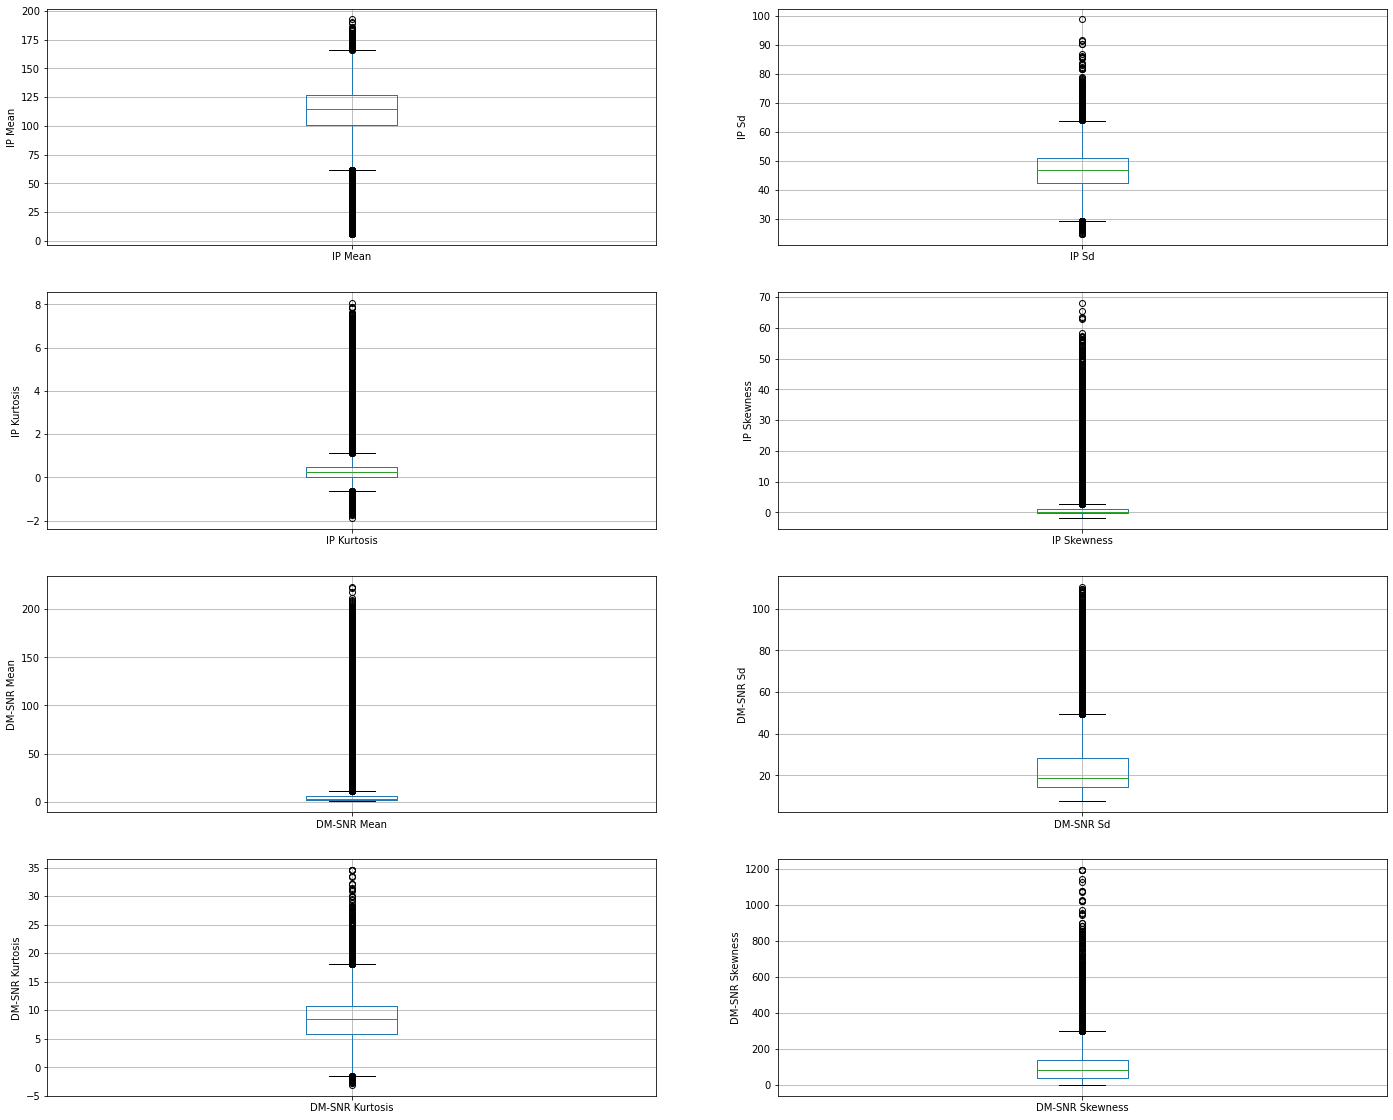

In [13]:
# draw boxplots

plt.figure(figsize=(24,20))
plt.subplot(4, 2, 1)
fig = df.boxplot(column='IP Mean')
fig.set_title('')
fig.set_ylabel('IP Mean')

plt.subplot(4, 2, 2)
fig = df.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')

plt.subplot(4, 2, 3)
fig = df.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')

plt.subplot(4, 2, 4)
fig = df.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')

plt.subplot(4, 2, 5)
fig = df.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')

plt.subplot(4, 2, 6)
fig = df.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')

plt.subplot(4, 2, 7)
fig = df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')

plt.subplot(4, 2, 8)
fig = df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')

Приведенные выше диаграммы подтверждают, что в этих переменных много выбросов.

### 9.2. Обработка выбросов с помощью SVM


Есть 2 варианта SVM: `hard-margin variant` и `soft-margin variant`.

- `hard-margin variant` имеет дело с выбросами. В этом случае мы хотим найти гиперплоскость с максимальным полем, чтобы каждая обучающая точка была правильно классифицирована с зазором не менее 1. Этот метод `плохо обрабатывает выбросы`.

- `soft-margin variant`. В этом случае у нас может быть несколько неправильно классифицированных точек или классифицированных с зазором меньше 1. Но за каждую такую ​​точку мы должны платить штраф в виде параметра, контролирующего выбросы C. Low C - означает допуск большего кол-ва выбросов и high C - меньшего кол-ва выбросов.

`Набор данных содержит выбросы, и значение C должно быть высоким при обучении модели.`

Теперь построим гистограммы, чтобы проверить распределения и выяснить, являются ли они нормальными.

Text(0, 0.5, 'Number of pulsar stars')

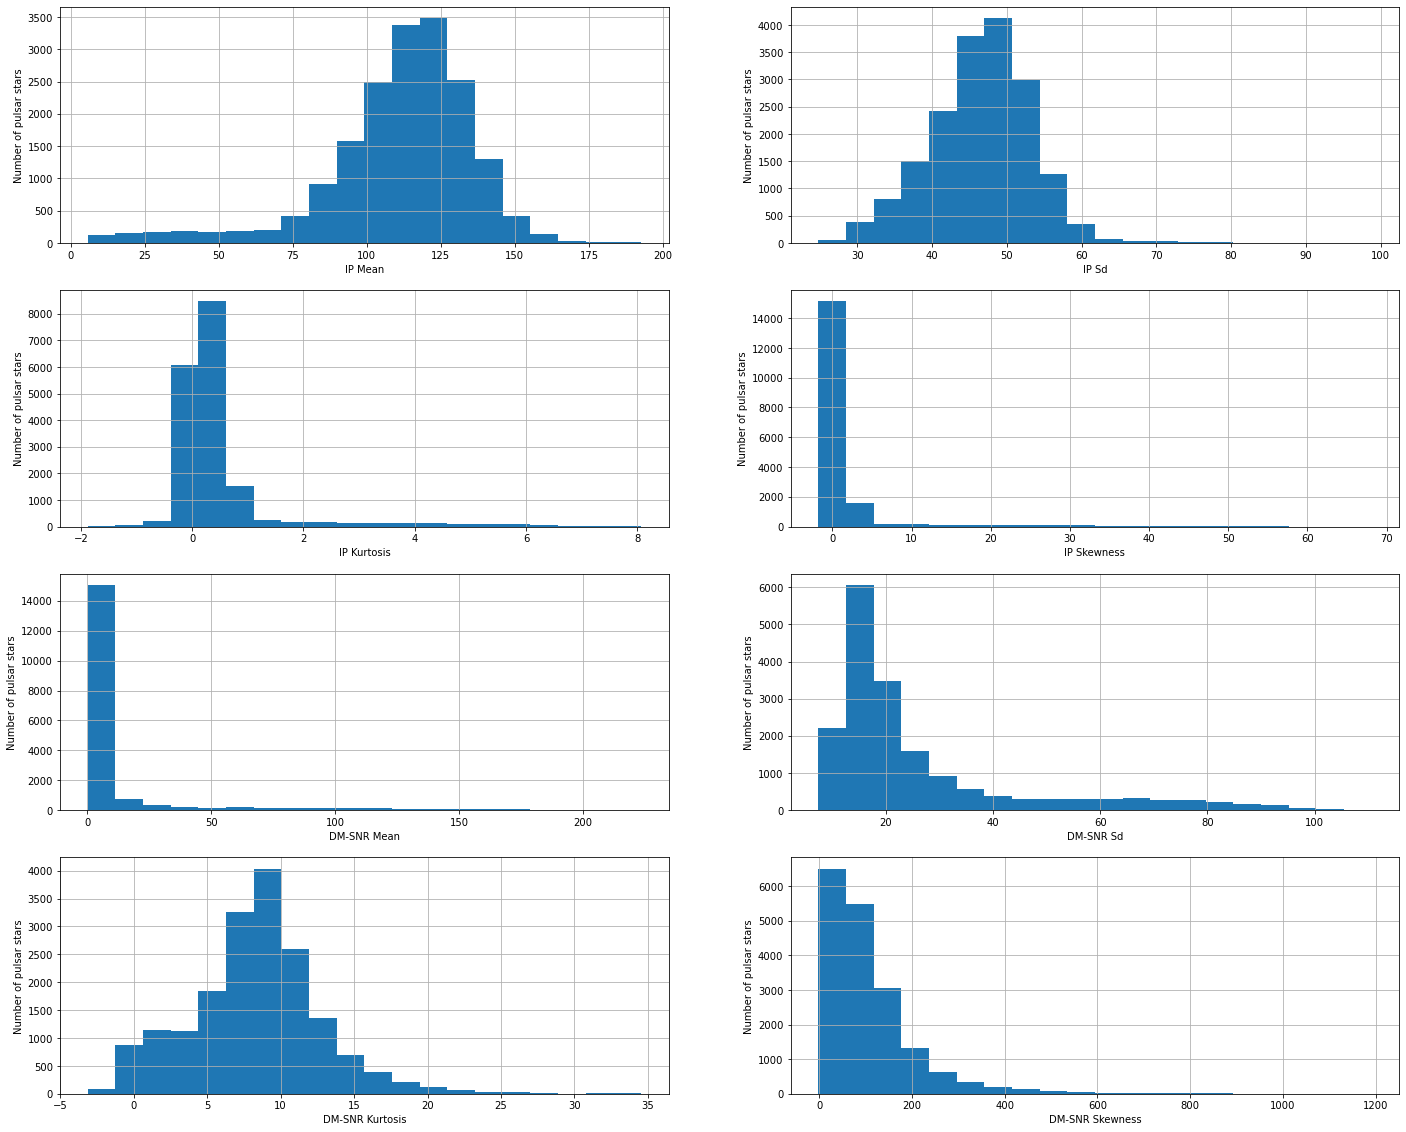

In [14]:
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = df['IP Mean'].hist(bins=20)
fig.set_xlabel('IP Mean')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 2)
fig = df['IP Sd'].hist(bins=20)
fig.set_xlabel('IP Sd')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 3)
fig = df['IP Kurtosis'].hist(bins=20)
fig.set_xlabel('IP Kurtosis')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 4)
fig = df['IP Skewness'].hist(bins=20)
fig.set_xlabel('IP Skewness')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 5)
fig = df['DM-SNR Mean'].hist(bins=20)
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 6)
fig = df['DM-SNR Sd'].hist(bins=20)
fig.set_xlabel('DM-SNR Sd')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 7)
fig = df['DM-SNR Kurtosis'].hist(bins=20)
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 8)
fig = df['DM-SNR Skewness'].hist(bins=20)
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Number of pulsar stars')


Мы видим, что все 8 непрерывных переменных искажены и их распределения отличаются от нормальных.

## 10. Подготовка данных

Подготовим наши наборы данных для решения задачи классификации. X - набор переменных без целевой. y - целевая переменная.

In [15]:
X = df.drop(['target_class'], axis=1)

y = df['target_class']

Разделение наборы на тренировочный и тестовый в соотношении 80:20

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [17]:
X_train.shape, X_test.shape

((14318, 8), (3580, 8))

In [18]:
cols = X_train.columns

Выполним масштабирование данных 

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [21]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [22]:
X_train.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04
mean,1.986604e-16,-6.757488e-16,2.125527e-17,3.581784e-17,-2.205248e-17,-1.583840e-16,-9.700300e-18,1.214786e-16
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-4.035499e+00,-3.181033e+00,-2.185946e+00,-5.744051e-01,-4.239001e-01,-9.733707e-01,-2.455649e+00,-1.003411e+00
25%,-3.896291e-01,-6.069473e-01,-4.256221e-01,-3.188054e-01,-3.664918e-01,-6.125457e-01,-5.641035e-01,-6.627590e-01
50%,1.587461e-01,5.846646e-02,-2.453172e-01,-2.578142e-01,-3.372294e-01,-4.067482e-01,3.170446e-02,-2.059136e-01
75%,6.267059e-01,6.501017e-01,-1.001238e-02,-1.419621e-01,-2.463724e-01,1.078934e-01,5.362759e-01,3.256217e-01
max,3.151882e+00,7.621116e+00,7.008906e+00,1.054430e+01,7.025568e+00,4.292181e+00,5.818557e+00,1.024613e+01


Теперь у нас есть набор данных `X_train`, готовый для загрузки в функцию классификатора.

## 11. SVM с гиперпараметрами по умолчанию

Гиперпараметры по умолчанию означают: `C = 1.0`, `kernel = rbf` и `gamma = auto` среди других параметров.

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc=SVC() 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

print('Оценка точности модели с гиперпараметрами по умолчанию: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Оценка точности модели с гиперпараметрами по умолчанию: 0.9827


Здесь `y_test` — это истинные метки классов, а `y_pred` — предсказанные метки классов в тестовом наборе.

Наиболее распространенным показателем для классификации является `точность (accuracy_score)`, то есть доля выборок, правильно спрогнозированных

<img src="https://machinelearningmastery.ru/img/0-598577-244306.png" width="50%">

Точность не всегда является наилучшей метрикой для оценки моделей классификации. Например, допустим, что мы пытаемся предсказать то, что происходит только 1 из 100 раз. Мы могли бы построить модель, которая получит точность 99%, сказав, что событие никогда не происходило. Тем не менее, мы ловим 0% событий, которые нас интересуют. Показатель 0% здесь является еще одним показателем производительности, известным как `чувствительность (recall_score)`.

**Запустим SVM с ядром rbf и C=100.0.**

Мы видели, что в нашем наборе данных есть выбросы. Мы должны увеличить `значение C`, так как более высокое `C` означает меньше выбросов. Запустим SVM с `kernel = rbf` и `C = 100.0`.

In [24]:
svc=SVC(C=100.0) 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

print('Оценка точности модели с ядром rbf и C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Оценка точности модели с ядром rbf и C=100.0 : 0.9832


Мы получаем более высокую точность с `C = 100.0`, поскольку более высокое C означает меньше выбросов. Давайте еще увеличим значение `C = 1000.0` и проверим точность.

**Запустим SVM с ядром rbf и C=1000.0.**


In [25]:
svc=SVC(C=1000.0) 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

print('Оценка точности модели с ядром rbf и C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Оценка точности модели с ядром rbf и C=1000.0 : 0.9816


В этом случае мы видим, что точность уменьшилась по сравнению с предыдущим вариантом.

## 12. SVM с линейным ядром

Запустим SVM с линейным ядром и C=1.0.

In [26]:
linear_svc=SVC(kernel='linear', C=1.0) 
linear_svc.fit(X_train,y_train)
y_pred_test=linear_svc.predict(X_test)

print('Оценка точности модели с linear ядром и C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Оценка точности модели с linear ядром and C=1.0 : 0.9830


#### Запустим SVM с линейным ядром и C=100.0.

In [27]:
linear_svc100=SVC(kernel='linear', C=100.0) 
linear_svc100.fit(X_train, y_train)
y_pred=linear_svc100.predict(X_test)

print('Оценка точности модели с linear ядром и C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Оценка точности модели с linear ядром и C=100.0 : 0.9832


#### Запустим SVM с линейным ядром и C=1000.0.

In [28]:
linear_svc1000=SVC(kernel='linear', C=1000.0) 
linear_svc1000.fit(X_train, y_train)
y_pred=linear_svc1000.predict(X_test)

print('Оценка точности модели с linear ядром и C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Оценка точности модели с linear ядром и C=1000.0 : 0.9832


Мы видим, что мы можем получить более высокую точность с C=100.0 и C=1000.0 по сравнению с C=1.0.

Теперь сравним точность тренировочного набора и тестового, чтобы проверить `переобучение`.

In [29]:
y_pred_train = linear_svc.predict(X_train)
y_pred_train

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [31]:
print('Аccuracy score тренировочного набора: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Аccuracy score тренировочного набора: 0.9783


Мы видим, что точность тренировочного набора и тестового набора очень сопоставима.

Проверка на переобучение

In [32]:
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.9783
Test set score: 0.9830


Оценка точности обучающего набора составляет 0.9783, а точность тестового набора - 0.9830. Эти два значения вполне сопоставимы. Так что о переобучении речи не идет.


#### Сравним точность модели с нулевой точностью

Итак, точность модели составляет 0.9832. Но мы не можем сказать, что наша модель очень хороша, исходя из указанной выше точности. 

Мы должны сравнить это значение с `нулевой точностью`. `Нулевая точность` — это точность, которой можно достичь, всегда предсказывая наиболее часто встречающийся класс.

Мы должны сначала проверить распределение классов в тестовом наборе.

In [33]:
y_test.value_counts()

0    3306
1     274
Name: target_class, dtype: int64

Мы видим, что вхождения наиболее частого класса 0 — 3306. Таким образом, мы можем вычислить нулевую точность, разделив 3306 на общее количество вхождений.

In [34]:
null_accuracy = (3306 / (3306 + 274))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9235


Мы видим, что показатель точности нашей модели равен 0.9830, а нулевой показатель точности равен 0.9235. Мы можем сделать вывод, что наш `классификатор SVM очень хорошо справляется с предсказанием меток классов`.

## 13. SVM с полиномиальным ядром

#### Запустим SVM с полиномиальным ядром и C=1.0.

In [35]:
poly_svc=SVC(kernel='poly', C=1.0) 
poly_svc.fit(X_train,y_train)
y_pred=poly_svc.predict(X_test)

print('Оценка точности модели с polynomial ядром и C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Оценка точности модели с polynomial ядром и C=1.0 : 0.9807


 #### Запустим SVM с полиномиальным ядром и C=100.0.

In [36]:
poly_svc100=SVC(kernel='poly', C=100.0) 
poly_svc100.fit(X_train, y_train)
y_pred=poly_svc100.predict(X_test)

print('Оценка точности модели с polynomial ядром и C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Оценка точности модели с polynomial ядром и C=1.0 : 0.9824


Полиномиальное ядро ​​дает низкую точность. Это может быть переобучением на тренировочном наборе.

## 14. SVM с сигмоидным ядром

#### Запустим SVM с сигмовидным ядром и C=1.0.

In [37]:
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 
sigmoid_svc.fit(X_train,y_train)
y_pred=sigmoid_svc.predict(X_test)

print('Оценка точности модели с sigmoid ядром и C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Оценка точности модели с sigmoid ядром и C=1.0 : 0.8858


#### Запустим SVM с сигмовидным ядром и C=100.0.

In [38]:
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 
sigmoid_svc100.fit(X_train,y_train)
y_pred=sigmoid_svc100.predict(X_test)

print('Оценка точности модели с sigmoid ядром и C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Оценка точности модели с sigmoid ядром и C=100.0 : 0.8855


Мы видим, что сигмовидное ядро ​​также работает плохо, как и полиномиальное ядро.

Мы получаем максимальную точность с `rbf` и `linear` ядром с C = 100.0. Точность 0.9832. Основываясь на приведенном выше анализе, можем сделать вывод, что точность нашей модели классификации очень хорошая. Наша модель очень хорошо справляется с прогнозированием меток классов.

Здесь у нас несбалансированный набор данных. Проблема в том, что точность является неадекватной мерой для количественной оценки эффективности прогнозирования в проблеме несбалансированного набора данных.

Таким образом, мы должны изучить `альтернативные показатели`, которые обеспечивают лучшее руководство при выборе моделей. В частности, хотелось бы знать основное `распределение значений` и `тип ошибок`, которые допускает наш классификатор.

Одной из таких метрик для анализа производительности модели в проблеме несбалансированных классов является `Confusion matrix` (матрица путанницы).

## 15. Матрица путаницы

`Матрица путаницы` — это инструмент для обобщения производительности алгоритма классификации. Матрица путаницы даст нам четкое представление о производительности модели классификации и типах ошибок, производимых моделью. Он дает нам сводку правильных и неправильных прогнозов с разбивкой по каждой категории. Сводка представлена ​​в табличной форме.

<img src="https://machinelearningmastery.ru/img/0-46433-548792.png" width="50%">

<img src="https://machinelearningmastery.ru/img/0-201780-668251.png" width="50%">

При оценке эффективности модели классификации возможны четыре типа результатов. Эти четыре результата описаны ниже:

- `Истинные положительные результаты (TP)` — возникают, когда мы предсказываем, что наблюдение принадлежит к определенному классу, и наблюдение действительно принадлежит к этому классу.

- `Истинные отрицательные результаты (TN)` — возникают, когда мы предсказываем, что наблюдение не принадлежит к определенному классу, и наблюдение на самом деле не принадлежит к этому классу.

- `Ложные срабатывания (FP)` — возникают, когда мы предсказываем, что наблюдение принадлежит к определенному классу, но на самом деле наблюдение не принадлежит к этому классу. Этот тип ошибки называется `ошибкой первого рода`.

- `Пропуски (FN)` — возникают, когда мы предсказываем, что наблюдение не принадлежит к определенному классу, но на самом деле оно принадлежит этому классу. Это очень серьезная ошибка, и она называется `ошибкой второго рода`.

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[3289   17]
 [  44  230]]

True Positives(TP) =  3289

True Negatives(TN) =  230

False Positives(FP) =  17

False Negatives(FN) =  44


Матрица путаницы показывает «3289 + 230 = 3519 правильных прогнозов» и «17 + 44 = 61 неверный прогноз».

В этом случае мы имеем

- `True Positives` (Actual Positive:1 and Predict Positive:1) - 3289

- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 230

- `False Positives` (Actual Negative:0 but Predict Positive:1) - 17 `(Type I error)`

- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 44 `(Type II error)`

<AxesSubplot:>

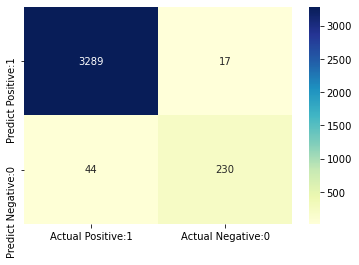

In [40]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## 16. Показатели классификации

`Отчет о классификации` — это еще один способ оценить производительность модели классификации. Он отображает показатели `точности`, `полноты`, `f1` и `поддержки` для модели. 

Мы можем вывести отчет о классификации следующим образом:

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3306
           1       0.93      0.84      0.88       274

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



#### Точность классификации

In [42]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [43]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Точность классификации : {0:0.4f}'.format(classification_accuracy))

Точность классификации : 0.9830


#### Ошибка классификации

In [44]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0170


#### 16.1. Точность (precision)

`Точность` можно определить как процент правильно предсказанных положительных результатов от всех предсказанных положительных результатов. Его можно представить как отношение истинных срабатываний (TP) к сумме истинных и ложных срабатываний (TP + FP).

`Precision определяет долю правильно предсказанного положительного результата`. Он больше связан с позитивным классом, чем с негативным.

Математически точность можно определить так $TP / (TP + FP)$.

In [45]:
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9949


#### 16.2. Чувствительность (recall)

Чувствительность  можно определить как процент правильно предсказанных положительных результатов от всех фактических положительных результатов. 

Представляется как `отношение истинно положительных результатов (TP) к сумме истинно положительных и ложноотрицательных результатов (TP + FN)`. Она определяет долю правильно предсказанных фактических положительных результатов.

Математически отзыв можно определить как $TP/(TP + FN)$.

In [48]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9868


#### 16.3. Истинная положительная скорость (f1-score)


True Positive Rate является синонимом чувствительности. Оценка f1 является гармоническим средним значением запоминания и точности, с более высокой оценкой в ​​качестве лучшей модели. Оценка f1 рассчитывается по следующей формуле:

<img src="https://machinelearningmastery.ru/img/0-534885-429307.png" width="40%">

In [49]:
true_positive_rate = 2 * precision * recall / (precision + recall)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9908


f1-score — это средневзвешенное гармоническое значение точности и полноты. Наилучший возможный показатель f1 будет равен 1.0, а наихудший — 0.0. Таким образом, показатель f1 всегда ниже показателей точности, поскольку они включают точность и полноту в свои вычисления. 

#### 16.4. Поддержка (support)

`Поддержка (support)` — это фактическое количество вхождений класса в нашем наборе данных.

## 17. ROC - кривая

Другим инструментом для визуального измерения производительности модели классификации является `ROC Curve` (кривой рабочих характеристик приемника). 

Кривая ROC представляет собой график, показывающий эффективность модели классификации при различных пороговых уровнях классификации. Кривая ROC отображает `процент истинных положительных результатов (TPR)` в сравнении с `уровнем ложных срабатываний (FPR)` при различных `пороговых уровнях`.

- `Истинная положительная скорость (TPR)` также называется `чувствительностью`. Она определяется как отношение $TP/(TP + FN)$.

- `Частота ложных срабатываний (FPR)` также называется `специфичностью`. Она определяется как отношение $FP/(FP + TN)$.

Кривая ROC отображает TPR в зависимости от FPR при разных пороговых уровнях классификации. Если мы снизим пороговые уровни, это может привести к тому, что больше элементов будут классифицированы как положительные. Это увеличит как истинные срабатывания (TP), так и ложные срабатывания (FP).

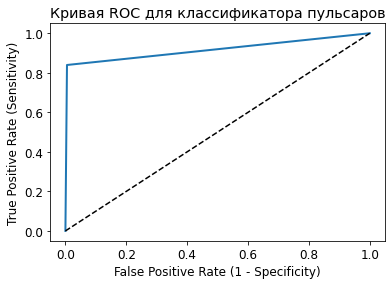

In [51]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('Кривая ROC для классификатора пульсаров')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()


Кривая ROC помогает нам выбрать пороговый уровень, который уравновешивает `чувствительность` и `специфичность` для конкретного контекста.

## 18. ROC  AUC

ROC AUC расшифровывается как `рабочая характеристика приемника — площадь под кривой`. Это метод сравнения производительности классификатора. В этой методике мы измеряем area under the curve (AUC). Совершенный классификатор будет иметь ROC AUC, равный 1, тогда как чисто случайный классификатор будет иметь ROC AUC, равный 0,5.

Таким образом, `ROC AUC — это процент графика ROC, который находится под кривой`.

In [52]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_test)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9171


Комментарии

- ROC AUC представляет собой сводку производительности классификатора с одним числом. Чем выше значение, тем лучше классификатор.

- ROC AUC нашей модели приближается к 1. Мы можем сделать вывод, что наш классификатор хорошо справляется с классификацией звезды-пульсара.

In [53]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(linear_svc, X_train, y_train, cv=10, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9756


По проверке, основанной на кросс-валидации можно почитать [здесь](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)

## 19. Стратифицированная k-кратная перекрестная проверка с разделением в случайном порядке

`k-кратная перекрестная проверка` — очень полезный метод для оценки производительности модели. Но здесь это не работает, потому что у нас несбалансированный набор данных. 

В случае несбалансированного набора данных нужно использовать другой метод для оценки производительности модели - метод `stratified k-fold cross-validation`.

В этом методе мы разделяем данные таким образом, чтобы пропорции между классами были такими же, как и во всем наборе данных. Кроме того, перетасуем данные перед разбиением.

Стратифицированная перекрестная проверка k-Fold с разделением в случайном порядке с линейным ядром

In [54]:
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5, shuffle=True, random_state=0)
linear_svc=SVC(kernel='linear')
linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)

In [55]:
print('Стратифицированные оценки перекрестной проверки с линейным ядром:\n\n{}'.format(linear_scores))

Стратифицированные оценки перекрестной проверки с линейным ядром:

[0.98296089 0.97458101 0.97988827 0.97876502 0.97848561]


In [56]:
print('Средняя стратифицированная оценка перекрестной проверки с линейным ядром:{:.4f}'.format(linear_scores.mean()))

Средняя стратифицированная оценка перекрестной проверки с линейным ядром:0.9789


Стратифицированная перекрестная проверка k-Fold с разделением в случайном порядке с ядром rbf

In [57]:
rbf_svc=SVC(kernel='rbf')
rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)

In [59]:
print('Стратифицированные оценки перекрестной проверки с ядром rbf:\n\n{}'.format(rbf_scores))

Стратифицированные оценки перекрестной проверки с ядром rbf:

[0.97849162 0.97011173 0.97318436 0.9709416  0.96982397]


In [60]:
print('Средняя оценка стратифицированной перекрестной проверки с ядром rbf:{:.4f}'.format(rbf_scores.mean()))

Средняя оценка стратифицированной перекрестной проверки с ядром rbf:0.9725


Мы получаем более высокую среднюю стратифицированную k-кратную оценку перекрестной проверки 0.9789 для модели с линейным ядром.

## 20. Оптимизация гиперпараметров с помощью GridSearch CV

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc=SVC() 
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]

grid_search = GridSearchCV(estimator = svc, param_grid = parameters, scoring = 'accuracy', cv = 5, verbose=0)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [62]:
print('GridSearch CV лучшая оценка: {:.4f}\n\n'.format(grid_search.best_score_))
print('Параметры, дающие наилучшие результаты:','\n\n', (grid_search.best_params_))
print('Оценка, которая выбранна через поиск:','\n\n', (grid_search.best_estimator_))

GridSearch CV лучшая оценка: 0.9793


Параметры, дающие наилучшие результаты: 

 {'C': 10, 'gamma': 0.3, 'kernel': 'rbf'}
Оценка, которая выбранна через поиск: 

 SVC(C=10, gamma=0.3)


In [64]:
print('Оценка GridSearchCV на тестовом наборе: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

Оценка GridSearchCV на тестовом наборе: 0.9835
